In [6]:
# Aarya Admane 22630 B2
# digit recognition

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 2: Load the MNIST dataset (automatically downloaded)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Normalize pixel values to the range [0, 1] and reshape to match input shape
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)  # -1 means infer the batch size
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 4: One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 5: Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9083 - loss: 0.2987 - val_accuracy: 0.9794 - val_loss: 0.0615
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9825 - val_loss: 0.0521
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9899 - loss: 0.0316 - val_accuracy: 0.9861 - val_loss: 0.0445
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9938 - loss: 0.0207 - val_accuracy: 0.9873 - val_loss: 0.0420
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9955 - loss: 0.0133 - val_accuracy: 0.9855 - val_loss: 0.0505


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


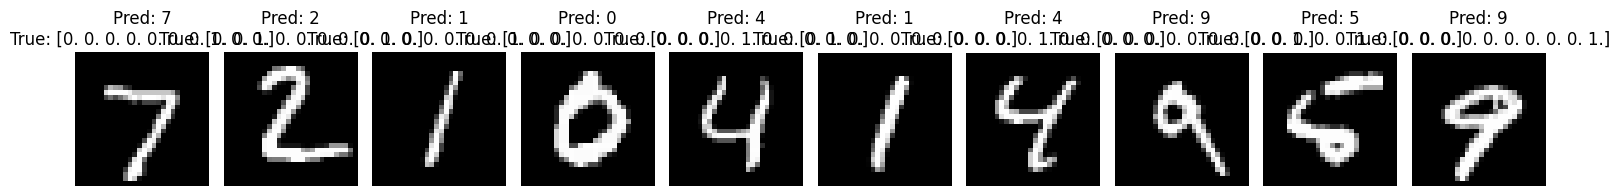

In [7]:
predictions = model.predict(x_test)

# visualise
def show_predictions(images, true_labels, predictions, num=10):
  plt.figure(figsize=(15,4))
  for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap="gray")
    pred_label = np.argmax(predictions[i])
    true_label = true_labels[i]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")
  plt.tight_layout()
  plt.show()

show_predictions(x_test, y_test, predictions)